In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import squarify

# Lectura del dataframe
url = 'https://raw.githubusercontent.com/iruiper/Cyberattacks-History/master/data/01_clean/EstadisticasAtaques2017_2020_Input.csv'
df = pd.read_csv(url, sep=';', decimal=',', encoding='utf-8')

# Mapping para modificar las etiquetas de los tipos de ataque
cols_map = {
    'Continent': 'Continent',
    'Code_attack_class_CC': 'Cyber Crime',
    'Code_attack_class_CE': 'Cyber Espionage',
    'Code_attack_class_CW': 'Cyber Warfare',
    'Code_attack_class_H': 'Hacktivism'
}

# Asignación de colores
colors = {
    'Cyber Crime': 'darkblue',
    'Cyber Espionage': 'darkcyan',
    'Cyber Warfare': 'lightsteelblue',
    'Hacktivism': 'deepskyblue'
}

# Selección de datos para generar el df con información global de ataques al sector público
cols = ['Continent','Code_attack_class_CC', 'Code_attack_class_CE', 'Code_attack_class_CW', 'Code_attack_class_H']
data = df.loc[(df.Continent != 'Desconocido') & (df.Code_target_class == 'O'), cols]

# Se agrupa la información de ataques para cada continente.
data_world_public = data.groupby('Continent').sum()
data_world_public.loc['Total', :] = data_world_public.sum()
data_world_public.rename(columns=cols_map, inplace=True)
data_world_public

,Cyber Crime,Cyber Espionage,Cyber Warfare,Hacktivism
Continent,,,,
América,178.0,24.0,7.0,16.0
Asia,12.0,44.0,6.0,2.0
Australia y Oceanía,5.0,3.0,0.0,0.0
Europa,29.0,29.0,11.0,18.0
International,3.0,34.0,4.0,3.0
África,6.0,0.0,0.0,1.0
Total,233.0,134.0,28.0,40.0


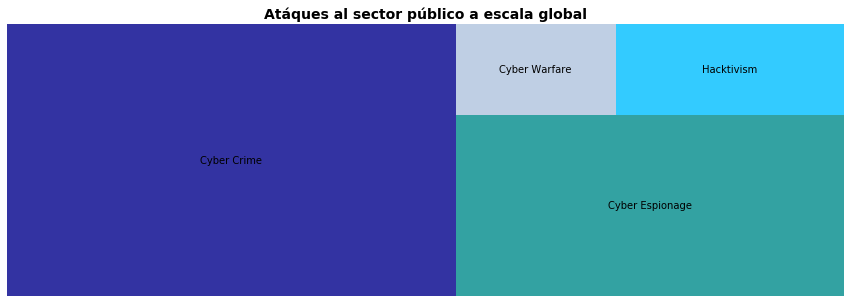

In [29]:
figure = plt.figure(figsize=(15,5))

# Se genera el TreeMap
axes = squarify.plot(sizes=data_world_public.loc['Total', :], label=data_world_public.columns, alpha=0.8,
                     color=data_world_public.columns.map(colors));
axes.set_title(f'Atáques al sector público a escala global', fontweight='bold', size=14);
plt.axis('off');

In [25]:
# Se genera el df con datos de los ataques producidos a nivel mundial que no afectan al sector público.
# Adicionalmente se descartan los outlyers.
data_global = df.loc[(df.Continent != 'Desconocido') & ~(df.Code_target_class.isin(['X', 'Y', 'Z', 'O'])), cols]

# Se agrupa la información por continentes y se suman las distintas tipologías de ataque
data_world_global = data_global.groupby('Continent').sum()
data_world_global.loc['Total', :] = data_global.sum()
data_world_global.rename(columns=cols_map, inplace=True)
data_world_global

,Cyber Crime,Cyber Espionage,Cyber Warfare,Hacktivism
Continent,,,,
América,956.0,13.0,4.0,9.0
Asia,124.0,16.0,10.0,10.0
Australia y Oceanía,33.0,3.0,0.0,0.0
Europa,226.0,22.0,14.0,25.0
International,105.0,21.0,3.0,2.0
África,15.0,0.0,1.0,0.0
Total,1459.0,75.0,32.0,46.0


In [35]:
# Normalización de los ataques recibidos al sector publico.
data_proportional = round(data_world_public / data_world_global * 100, 2)
data_proportional.fillna(0, inplace=True)
data_proportional

,Cyber Crime,Cyber Espionage,Cyber Warfare,Hacktivism
Continent,,,,
América,18.62,184.62,175.00,177.78
Asia,9.68,275.00,60.00,20.00
Australia y Oceanía,15.15,100.00,0.00,0.00
Europa,12.83,131.82,78.57,72.00
International,2.86,161.90,133.33,150.00
África,40.00,0.00,0.00,inf
Total,15.97,178.67,87.50,86.96


(0.0, 100.0, 0.0, 100.0)

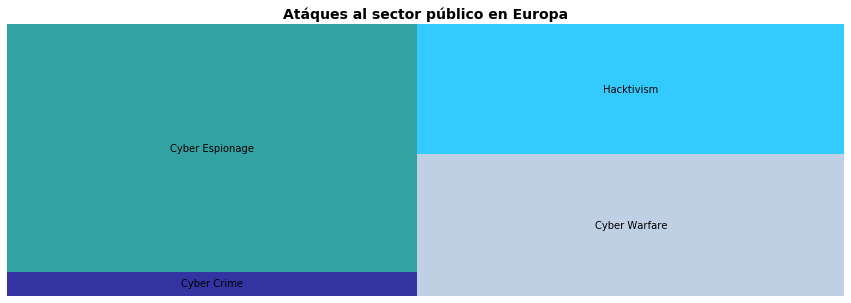

In [36]:
figure_europa = plt.figure(figsize=(15,5))

# Creación del treemap de los ataques normalizados.
axes_europa = squarify.plot(sizes=data_proportional.loc['Europa', :], label=data_proportional.columns, alpha=0.8,
                     color=data_proportional.columns.map(colors))
axes_europa.set_title(f'Atáques al sector público en Europa', fontweight='bold', size=14)
plt.axis('off');
